# Тестовое задание на позицию "Аналитик данных" в ООО "Авангард"

## Загрузка данных

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\Lenovo\Downloads\train - train.csv'
df = pd.read_csv(file_path)
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


## Задание 1а

**Группировка по "Sub-Category" и подсчет количества покупок**

In [13]:
purchases_count = df.groupby('Sub-Category').size()
purchases_count

Sub-Category
Accessories     756
Appliances      459
Art             785
Binders        1492
Bookcases       226
Chairs          607
Copiers          66
Envelopes       248
Fasteners       214
Furnishings     931
Labels          357
Machines        115
Paper          1338
Phones          876
Storage         832
Supplies        184
Tables          314
dtype: int64

**Получение топ 4 подгрупп с наибольшим количеством покупок**

In [14]:
top_4_subcategories = purchases_count.nlargest(4)
top_4_subcategories

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
dtype: int64

**Визуализация с помощью гистограммы**

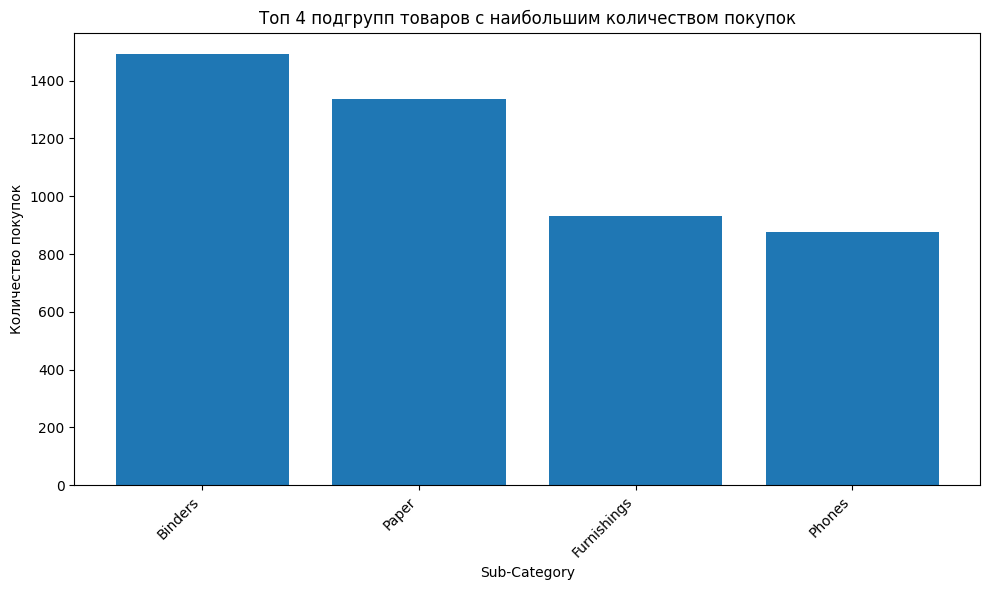

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(top_4_subcategories.index, top_4_subcategories.values)
plt.xlabel('Sub-Category')
plt.ylabel('Количество покупок')
plt.title('Топ 4 подгрупп товаров с наибольшим количеством покупок')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Задание 1б

**Преобразуем столбец 'Order Date' в формат даты**

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,"37229,08"
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42133,86"
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,"8639,472"
9796,740,2015-01-04,Стандарт,Урал,Labels,"15246,05"
9797,741,2015-01-04,Стандарт,Урал,Storage,"20415,81"
9798,742,2015-01-04,Стандарт,Урал,Binders,"4559,085"


**Фильтруем данные по дате, оставив только покупки за последние два года**

In [21]:
max_date = df['Order Date'].max()
df = df[df['Order Date'] >= max_date - pd.DateOffset(years=2)]
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,"37229,08"
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42133,86"
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
5803,6009,2016-12-30,Стандарт,Калиниград,Paper,"27642,19"
5804,6010,2016-12-30,Стандарт,Калиниград,Storage,"30587,93"
5805,6011,2016-12-30,Стандарт,Калиниград,Machines,"25846,45"
5806,6012,2016-12-30,Стандарт,Калиниград,Envelopes,"22003,24"


**Группировка по 'Sub-Category' и подсчет количества покупок**

In [22]:
purchase_counts = df.groupby('Sub-Category').size()
purchase_counts

Sub-Category
Accessories    450
Appliances     274
Art            458
Binders        907
Bookcases      130
Chairs         348
Copiers         36
Envelopes      131
Fasteners      122
Furnishings    558
Labels         208
Machines        66
Paper          810
Phones         511
Storage        492
Supplies       118
Tables         189
dtype: int64

**Выбираем топ 4 подгрупп товаров с наибольшим количеством покупок**

In [23]:
top_categories = purchase_counts.nlargest(4)
top_categories

Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
dtype: int64

**Визуализация результата**

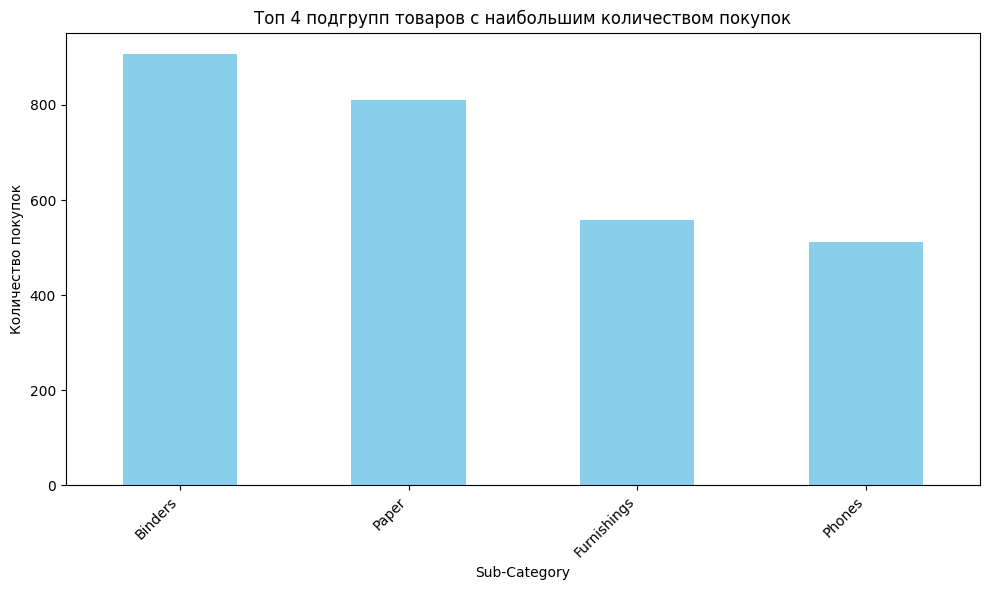

In [24]:
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Топ 4 подгрупп товаров с наибольшим количеством покупок')
plt.xlabel('Sub-Category')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Задание 1в

**Преобразуем столбец 'Order Date' в формат даты**

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,"37229,08"
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42133,86"
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,"8639,472"
9796,740,2015-01-04,Стандарт,Урал,Labels,"15246,05"
9797,741,2015-01-04,Стандарт,Урал,Storage,"20415,81"
9798,742,2015-01-04,Стандарт,Урал,Binders,"4559,085"


**Фильтруем данные по дате, оставив только покупки за последний год**

In [28]:
max_date = df['Order Date'].max()
df = df[df['Order Date'] >= max_date - pd.DateOffset(years=1)]
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,"37229,08"
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42133,86"
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
3268,5760,2017-12-30,Same Day,Калиниград,Storage,"4309,298"
3269,5761,2017-12-30,Same Day,Калиниград,Binders,"1992,969"
3270,7562,2017-12-30,Первый класс,Владивосток,Chairs,"24409,77"
3271,8667,2017-12-30,Первый класс,Владивосток,Art,"38318,06"


**Группируем по 'Sub-Category' и считаем количество покупок**

In [29]:
purchases_count = df.groupby('Sub-Category').size()
purchases_count

Sub-Category
Accessories    266
Appliances     161
Art            282
Binders        496
Bookcases       76
Chairs         188
Copiers         22
Envelopes       71
Fasteners       63
Furnishings    310
Labels         114
Machines        33
Paper          454
Phones         291
Storage        283
Supplies        59
Tables         104
dtype: int64

**Выбираем топ 4 подгруппы товаров с наибольшим количеством покупок**

In [31]:
top_4_subcategories = purchases_count.nlargest(4)
top_4_subcategories

Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
dtype: int64

**Визуализируем результат**

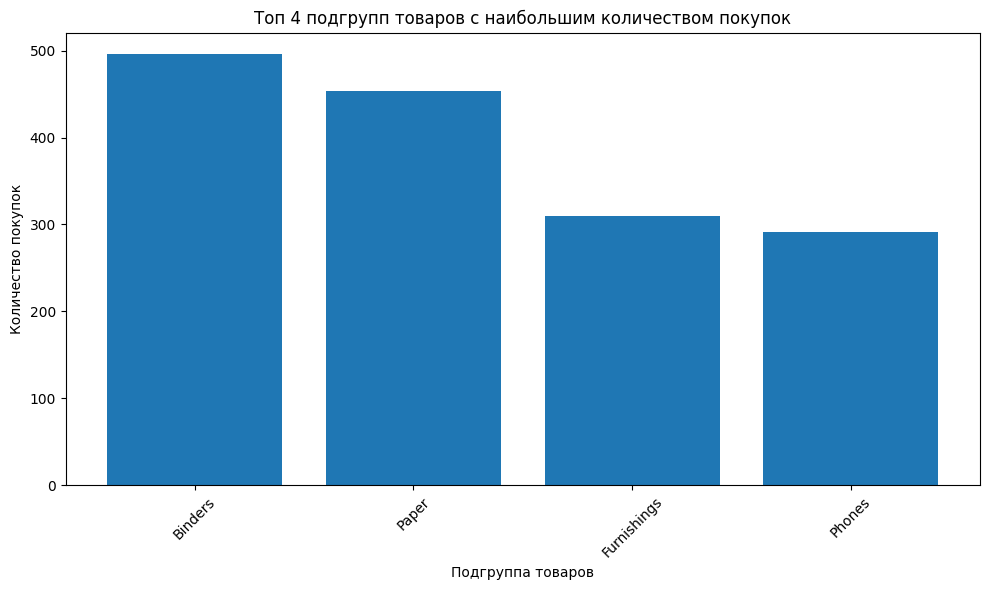

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(top_4_subcategories.index, top_4_subcategories.values)
plt.title('Топ 4 подгрупп товаров с наибольшим количеством покупок')
plt.xlabel('Подгруппа товаров')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Вывод:

а) **За все время** чаще всего покупали товары из категорий "Binders", "Paper", "Furnishings" и "Phones"

б) **За последние два года** чаще всего покупали товары из категорий "Binders", "Paper", "Furnishings" и "Phones"

в) **За последний год** чаще всего покупали товары из категорий "Binders", "Paper", "Furnishings" и "Phones"

## Задание 2

**Преобразуем столбец "Sales" в более удобный формат**

In [36]:
df['Sales'] = df['Sales'].str.replace(',', '.').astype(float)
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,8639.472
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085


**Строим boxplot для исходных данных**

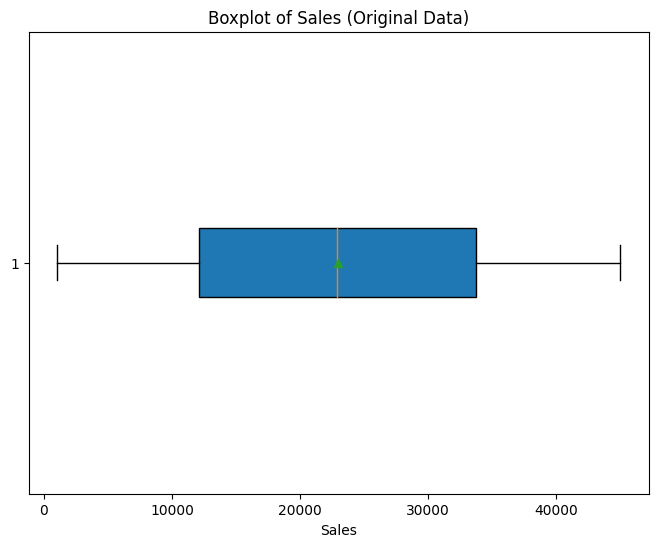

In [37]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'], vert=False, patch_artist=True, showmeans=True)
plt.title('Boxplot of Sales (Original Data)')
plt.xlabel('Sales')
plt.show()

**Выявление выбросов с помощью правила трех сигм**

In [38]:
mean = df['Sales'].mean()
std = df['Sales'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
outliers

,ID,Order Date,Class,Region,Sub-Category,Sales


In [39]:
mean

22921.75773653061

In [40]:
std

12601.999815243944

In [41]:
lower_bound

-14884.241709201222

In [42]:
upper_bound

60727.757182262445

**Удаляем выбросы**

In [43]:
df_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]
df_cleaned

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,8639.472
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085


**Строим boxplot для данных без выбросов**

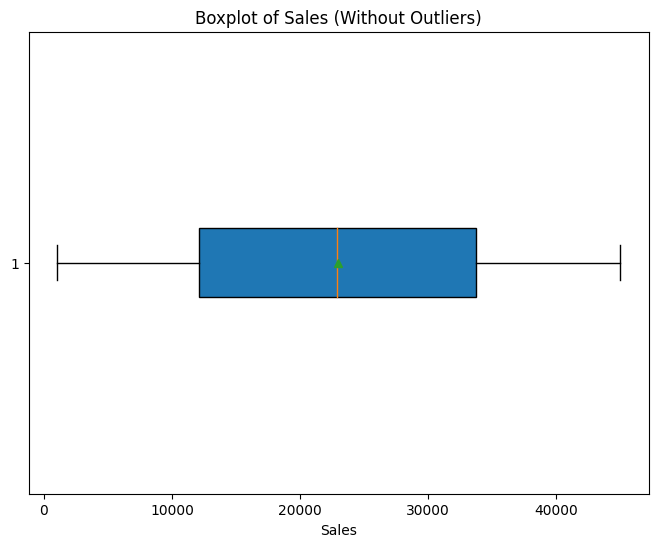

In [44]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['Sales'], vert=False, patch_artist=True, showmeans=True)
plt.title('Boxplot of Sales (Without Outliers)')
plt.xlabel('Sales')
plt.show()

**Вывод о мажоритарной черте распределения продаж**

In [45]:
print(f'Среднее значение продаж: {df_cleaned["Sales"].mean():.2f}')
print(f'Медиана продаж: {df_cleaned["Sales"].median():.2f}')

Среднее значение продаж: 22921.76
Медиана продаж: 22882.06


### Вывод

**Аномальных значений найдено не было**

**Распределение продаж смещено вправо (справа от медианы больше данных).**

## Задание 3

**Преобразование колонки "Sales" в числовой формат**

In [63]:
df['Sales'] = df['Sales'].str.replace(',', '.').astype(float)
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,8639.472
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085


**Преобразование колонки "Order Date" в формат даты**

In [64]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


**Определяем границы для групп**

In [66]:
bins = [0, 10000, 30000, float('inf')]
labels = ['Маленькие', 'Средние', 'Высокие']

**Создаем новую колонку "Sale_group" с помощью функции pd.cut()**

In [67]:
df['Sale_group'] = pd.cut(df['Sales'], bins=bins, labels=labels, include_lowest=True)
df

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080,Высокие
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,Средние
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860,Высокие
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000,Средние
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130,Средние
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472,Маленькие
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050,Средние
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810,Средние
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085,Маленькие


**Для каждой группы в каждом регионе вычисляем общую сумму продаж, среднюю сумму продаж и количество сделок.**

In [71]:
df_aggregated = df.groupby(['Region', 'Sale_group'])['Sales'].agg(['sum', 'mean', 'count']).reset_index()
df_aggregated.columns = ['Region', 'Sale_group', 'Total Sales', 'Average Sales', 'Number of Transactions']
df_aggregated['Total Sales'] = df_aggregated['Total Sales'].apply(lambda x: f'{x:,.2f}'.replace(',', ' '))
df_aggregated

,Region,Sale_group,Total Sales,Average Sales,Number of Transactions
0,Владивосток,Маленькие,3 106 636.10,5393.465460,576
1,Владивосток,Средние,24 793 441.66,19914.410972,1245
2,Владивосток,Высокие,36 052 609.12,37398.972116,964
3,Калиниград,Маленькие,3 399 869.56,5546.279874,613
4,Калиниград,Средние,30 415 734.16,20129.539484,1511
5,Калиниград,Высокие,38 114 696.00,37514.464567,1016
6,Москва,Маленькие,1 798 488.99,5516.837405,326
7,Москва,Средние,14 623 618.17,20170.507821,725
8,Москва,Высокие,20 469 544.35,37421.470475,547
9,Урал,Маленькие,2 415 068.79,5366.819524,450


**Создание столбчатой диаграммы для сравнения сумм продаж по группам в каждом регионе**

In [78]:
# Преобразование столбца 'Total Sales' обратно к числовому типу
df_aggregated['Total Sales'] = df_aggregated['Total Sales'].str.replace(' ', '').astype(float)

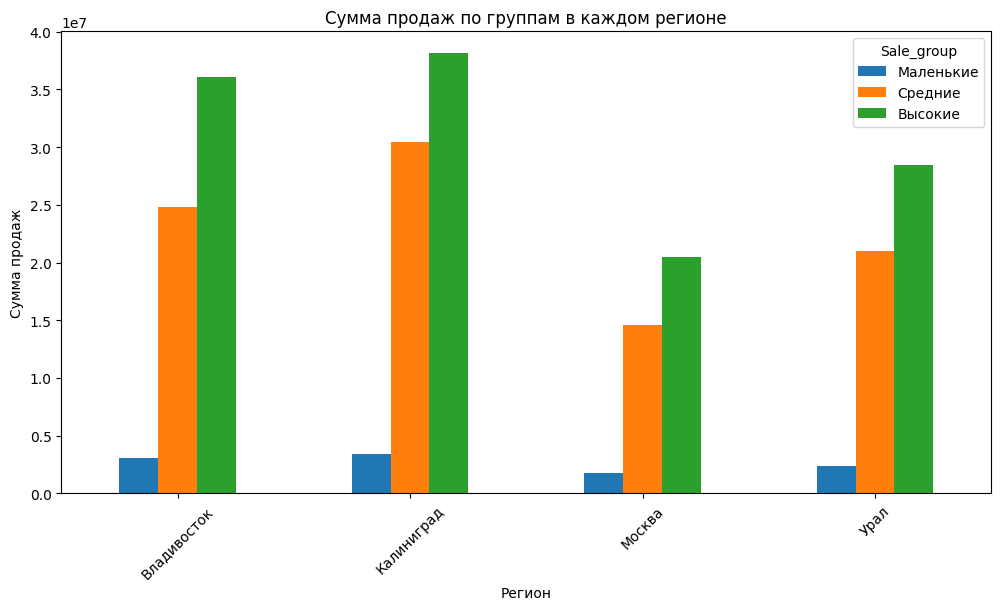

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
df_aggregated.groupby(['Region', 'Sale_group'])['Total Sales'].sum().unstack().plot(kind='bar', ax=ax)
ax.set_ylabel('Сумма продаж')
ax.set_xlabel('Регион')
ax.set_title('Сумма продаж по группам в каждом регионе')
plt.xticks(rotation=45)
plt.show()

**Создание boxplot для отображения распределения продаж в разных регионах**

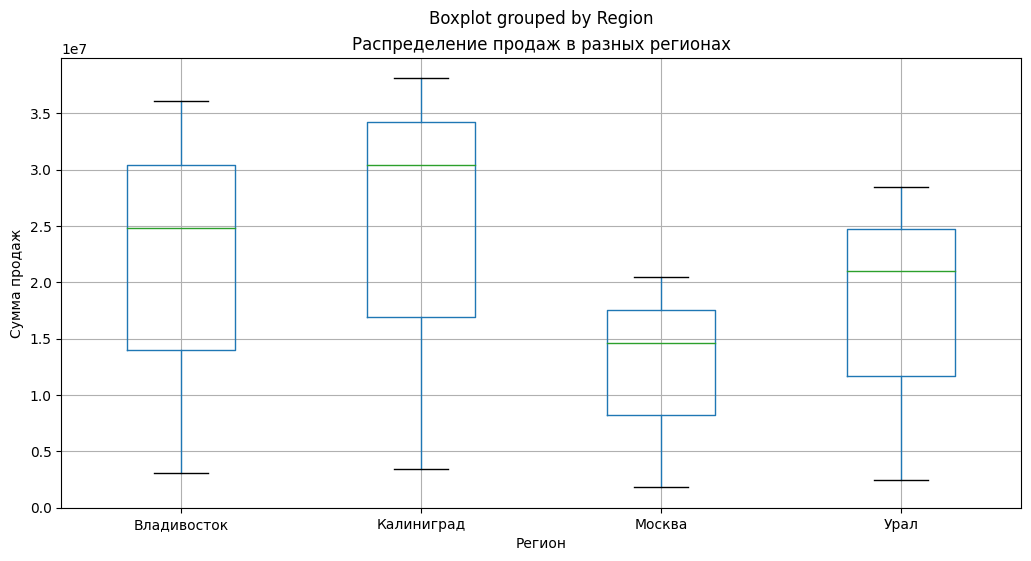

In [80]:
fig, ax = plt.subplots(figsize=(12, 6))
df_aggregated.boxplot(column='Total Sales', by='Region', ax=ax)
ax.set_ylabel('Сумма продаж')
ax.set_xlabel('Регион')
ax.set_title('Распределение продаж в разных регионах')
plt.show()

**Создание гистограммы для сравнения количества продаж по группам и регионам**

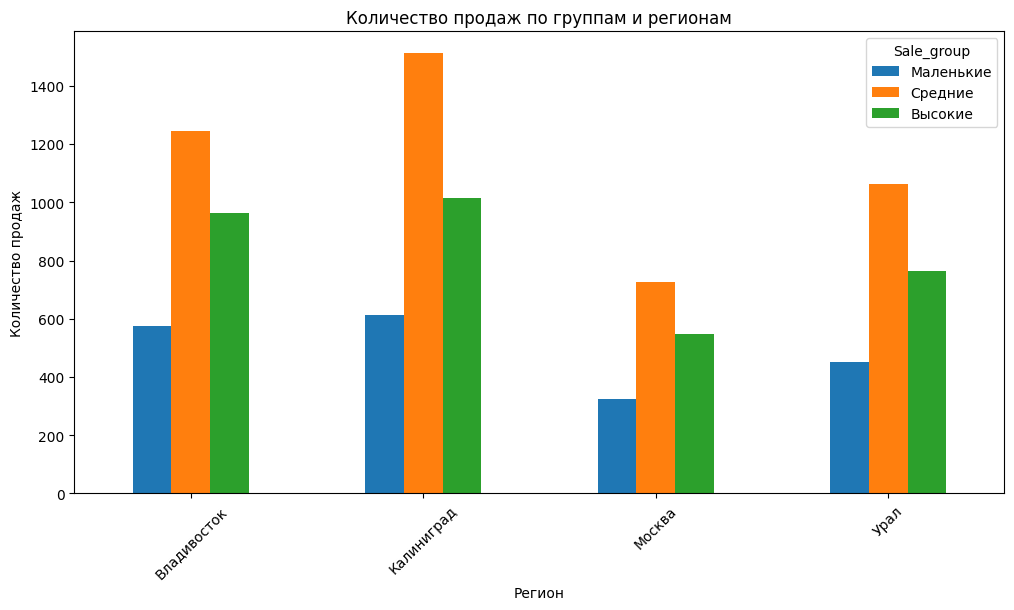

In [81]:
fig, ax = plt.subplots(figsize=(12, 6))
df_aggregated.groupby(['Region', 'Sale_group'])['Number of Transactions'].sum().unstack().plot(kind='bar', ax=ax)
ax.set_ylabel('Количество продаж')
ax.set_xlabel('Регион')
ax.set_title('Количество продаж по группам и регионам')
plt.xticks(rotation=45)
plt.show()

### Анализ продаж по регионам и группам

Анализ таблицы с агрегированными данными о продажах по регионам и группам выявляет следующие основные тенденции:

* **Калиниград** демонстрирует наибольшую сумму продаж среди всех регионов, за ним следует **Владивосток**, затем **Урал** и **Москва**.

* **Группа "Высокие"** является наиболее прибыльной во всех регионах, демонстрируя наибольшую сумму и среднюю стоимость продаж.

* **Группа "Средние"** показывает наибольшее количество сделок во всех регионах.